In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
# import datetime

In [4]:
cleaned_df = pd.read_csv('../data/trip_cleaned.csv')

In [5]:
sampled = cleaned_df.sample(5000)

In [6]:
# sampled['total_fare_over_time'] = sampled['total_amount']/sampled['trip_time']
sampled['pickup_time'] = pd.to_datetime(sampled['pickup_time']).dt.hour * 60 + pd.to_datetime(sampled['pickup_time']).dt.minute
# sampled['fare_over_time'] = sampled['fare_amount']/sampled['trip_time']
# sampled['pickup_time'].apply(lambda x: \
#                     datetime.combine(datetime.date.today(), datetime.datetime.strptime(x, '%H:%M:%S')))

In [7]:
sampled['dist_time_ratio'] = sampled['trip_distance']/sampled['trip_time']

## trip time ~ distance

Text(0, 0.5, 'trip_time')

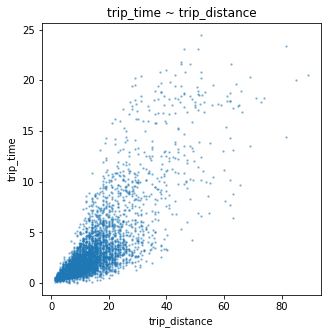

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.scatter(sampled['trip_time'], sampled['trip_distance'], s = 2, alpha=0.4)
ax.set_title('trip_time ~ trip_distance')
ax.set_xlabel('trip_distance')
ax.set_ylabel('trip_time')

### weekday vs weekend

In [9]:
sampled_weekday = sampled.loc[sampled['pickup_weekday'] == 1]
sampled_weekend = sampled.loc[sampled['pickup_weekday'] == 0]

Text(0, 0.5, 'trip_time')

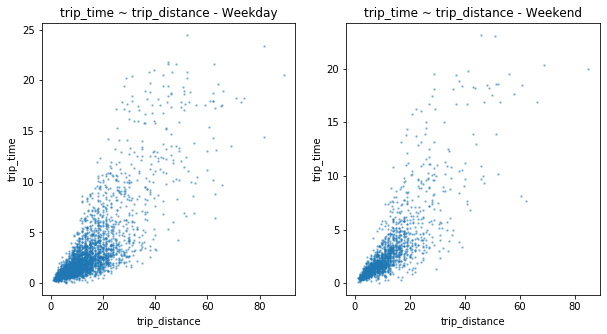

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].scatter(sampled_weekday['trip_time'], sampled_weekday['trip_distance'], s = 2, alpha=0.4)
ax[0].set_title('trip_time ~ trip_distance - Weekday')
ax[0].set_xlabel('trip_distance')
ax[0].set_ylabel('trip_time')

ax[1].scatter(sampled_weekend['trip_time'], sampled_weekend['trip_distance'], s = 2, alpha=0.4)
ax[1].set_title('trip_time ~ trip_distance - Weekend')
ax[1].set_xlabel('trip_distance')
ax[1].set_ylabel('trip_time')

## trip_time/distance ~ time of the day

Text(0, 0.5, 'distance - time ratio')

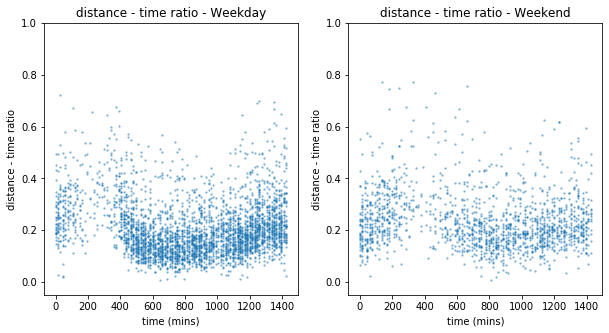

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].scatter(sampled_weekday['pickup_time'], sampled_weekday['dist_time_ratio'], s = 2, alpha=0.4)
ax[0].set_ylim(-0.05, 1)
ax[0].set_title('distance - time ratio - Weekday')
ax[0].set_xlabel('time (mins)')
ax[0].set_ylabel('distance - time ratio')

ax[1].scatter(sampled_weekend['pickup_time'], sampled_weekend['dist_time_ratio'], s = 2, alpha=0.4)
ax[1].set_ylim(-0.05, 1)
ax[1].set_title('distance - time ratio - Weekend')
ax[1].set_xlabel('time (mins)')
ax[1].set_ylabel('distance - time ratio')